# EXAMPLE NOTEBOOK

This is a notebook to demonstrate how you can generate a valid prediction file for submission.

We will be using a random classifier/regressor for demonstration purposes only. 

Please do NOT copy the pipeline or the algorithm used here.

# Imports

In [76]:
import numpy as np
import pandas as pd

In [77]:
df_train_HEF = pd.read_csv('../data/MIMIC/MIMIC_III_dataset_death/mimic_train.csv')
df_test_HEF = pd.read_csv('../data/MIMIC/MIMIC_III_dataset_death/mimic_test_death.csv')

df_train_LOS = pd.read_csv('../data/MIMIC/MIMIC_III_dataset_LOS/mimic_train.csv')
df_test_LOS = pd.read_csv('../data/MIMIC/MIMIC_III_dataset_LOS/mimic_test_los.csv')

sample_HEF = pd.read_csv('../data/MIMIC/garcia_joan_CML_2025.csv')
sample_LOS = pd.read_csv('../data/MIMIC/comin_felix_CML_2025.csv')

In [78]:
display(df_train_HEF)
display(df_train_LOS)
display(df_test_HEF)
display(df_test_LOS)

,HOSPITAL_EXPIRE_FLAG,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,...,Diff,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT,LOS
0,0,55440,195768,228357,89.0,145.0,121.043478,74.0,127.0,106.586957,...,-61961.78470,EMERGENCY,Medicare,PROTESTANT QUAKER,SINGLE,WHITE,GASTROINTESTINAL BLEED,5789,MICU,4.5761
1,0,76908,126136,221004,63.0,110.0,79.117647,89.0,121.0,106.733333,...,-43146.18378,EMERGENCY,Private,UNOBTAINABLE,MARRIED,WHITE,ESOPHAGEAL FOOD IMPACTION,53013,MICU,0.7582
2,0,95798,136645,296315,81.0,98.0,91.689655,88.0,138.0,112.785714,...,-42009.96157,EMERGENCY,Medicare,PROTESTANT QUAKER,SEPARATED,BLACK/AFRICAN AMERICAN,UPPER GI BLEED,56983,MICU,3.7626
3,0,40708,102505,245557,76.0,128.0,98.857143,84.0,135.0,106.972973,...,-43585.37922,ELECTIVE,Medicare,NOT SPECIFIED,WIDOWED,WHITE,HIATAL HERNIA/SDA,5533,SICU,3.8734
4,0,28424,127337,225281,NaN,NaN,NaN,NaN,NaN,NaN,...,-50271.76602,EMERGENCY,Medicare,JEWISH,WIDOWED,WHITE,ABDOMINAL PAIN,56211,TSICU,5.8654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20880,0,28043,135417,244530,65.0,92.0,78.500000,60.0,160.0,110.976190,...,-60714.92678,EMERGENCY,Medicare,CATHOLIC,MARRIED,WHITE,ALTERED MENTAL STATUS,3229,MICU,11.6116
20881,0,87605,191007,216116,74.0,112.0,89.156250,100.0,150.0,123.272727,...,-46217.77777,EMERGENCY,Private,NOT SPECIFIED,MARRIED,BLACK/HAITIAN,NEW BRAIN MASS,1918,SICU,1.1593
20882,0,47492,152608,274507,58.0,97.0,76.933333,94.0,131.0,112.037037,...,-39830.10848,EMERGENCY,Private,PROTESTANT QUAKER,DIVORCED,BLACK/AFRICAN AMERICAN,HYPOGLYCEMIA,24980,MICU,1.8830
20883,0,62946,191485,225930,59.0,102.0,81.844444,96.0,150.0,123.837209,...,-59205.26841,EMERGENCY,Medicare,PROTESTANT QUAKER,WIDOWED,WHITE,CORONARY ARTERY DISEASE\PERCUTANEOUS CORONARY ...,41401,CCU,3.1981


,HOSPITAL_EXPIRE_FLAG,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,...,Diff,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT,LOS
0,0,55440,195768,228357,89.0,145.0,121.043478,74.0,127.0,106.586957,...,-61961.78470,EMERGENCY,Medicare,PROTESTANT QUAKER,SINGLE,WHITE,GASTROINTESTINAL BLEED,5789,MICU,4.5761
1,0,76908,126136,221004,63.0,110.0,79.117647,89.0,121.0,106.733333,...,-43146.18378,EMERGENCY,Private,UNOBTAINABLE,MARRIED,WHITE,ESOPHAGEAL FOOD IMPACTION,53013,MICU,0.7582
2,0,95798,136645,296315,81.0,98.0,91.689655,88.0,138.0,112.785714,...,-42009.96157,EMERGENCY,Medicare,PROTESTANT QUAKER,SEPARATED,BLACK/AFRICAN AMERICAN,UPPER GI BLEED,56983,MICU,3.7626
3,0,40708,102505,245557,76.0,128.0,98.857143,84.0,135.0,106.972973,...,-43585.37922,ELECTIVE,Medicare,NOT SPECIFIED,WIDOWED,WHITE,HIATAL HERNIA/SDA,5533,SICU,3.8734
4,0,28424,127337,225281,NaN,NaN,NaN,NaN,NaN,NaN,...,-50271.76602,EMERGENCY,Medicare,JEWISH,WIDOWED,WHITE,ABDOMINAL PAIN,56211,TSICU,5.8654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20880,0,28043,135417,244530,65.0,92.0,78.500000,60.0,160.0,110.976190,...,-60714.92678,EMERGENCY,Medicare,CATHOLIC,MARRIED,WHITE,ALTERED MENTAL STATUS,3229,MICU,11.6116
20881,0,87605,191007,216116,74.0,112.0,89.156250,100.0,150.0,123.272727,...,-46217.77777,EMERGENCY,Private,NOT SPECIFIED,MARRIED,BLACK/HAITIAN,NEW BRAIN MASS,1918,SICU,1.1593
20882,0,47492,152608,274507,58.0,97.0,76.933333,94.0,131.0,112.037037,...,-39830.10848,EMERGENCY,Private,PROTESTANT QUAKER,DIVORCED,BLACK/AFRICAN AMERICAN,HYPOGLYCEMIA,24980,MICU,1.8830
20883,0,62946,191485,225930,59.0,102.0,81.844444,96.0,150.0,123.837209,...,-59205.26841,EMERGENCY,Medicare,PROTESTANT QUAKER,WIDOWED,WHITE,CORONARY ARTERY DISEASE\PERCUTANEOUS CORONARY ...,41401,CCU,3.1981


,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,...,ADMITTIME,Diff,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT
0,64058,146725,208169,58.0,90.0,85.244898,77.0,153.0,98.490909,40.0,...,2196-02-23 11:45:00,-67454.42740,ELECTIVE,Medicare,CATHOLIC,MARRIED,WHITE,AORTIC STENOSIS\CORONARY ARTERY BYPASS GRAFT W...,4241,CSRU
1,55871,108789,251754,91.0,145.0,115.055556,73.0,143.0,101.210526,42.0,...,2103-10-22 23:58:00,-34204.08546,EMERGENCY,Private,NOT SPECIFIED,MARRIED,WHITE,HYPERGLYCEMIA,25013,MICU
2,42892,139885,242171,106.0,132.0,117.750000,93.0,137.0,116.222222,51.0,...,2115-06-28 07:15:00,-38710.61714,ELECTIVE,Medicare,CATHOLIC,MARRIED,WHITE,KIDNEY STONES/SDA,5920,MICU
3,66629,173017,263035,72.0,105.0,83.627119,72.0,168.0,126.981818,39.0,...,2162-08-01 21:00:00,-54902.54313,EMERGENCY,Private,EPISCOPALIAN,WIDOWED,WHITE,RIGHT FEMUR FRACTURE,82120,CCU
4,79851,171573,279388,85.0,124.0,98.600000,86.0,144.0,110.666667,52.0,...,2103-01-16 22:05:00,-33906.93488,EMERGENCY,Medicare,CATHOLIC,SINGLE,WHITE,PNEUMONIA;RAPID AF;HYPOXIA,51884,MICU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5216,28941,107962,278087,63.0,131.0,97.130435,108.0,140.0,122.631579,49.0,...,2144-07-16 11:01:00,-49718.62088,EMERGENCY,Medicare,OTHER,SINGLE,WHITE,MEDIASTINAL MASS,20152,SICU
5217,27436,112243,266914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2143-03-28 10:45:00,-49300.08263,ELECTIVE,Medicare,PROTESTANT QUAKER,MARRIED,WHITE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,4241,CSRU
5218,44232,156430,213413,74.0,91.0,81.488372,117.0,171.0,143.395349,48.0,...,2102-04-03 04:04:00,-33708.91976,EMERGENCY,Medicare,GREEK ORTHODOX,WIDOWED,WHITE - RUSSIAN,SMALL BOWEL OBSTRUCTION;SEPSIS,34839,MICU
5219,76544,148900,286384,70.0,89.0,80.276596,68.0,137.0,110.680851,42.0,...,2138-05-19 07:15:00,-46198.14080,ELECTIVE,Medicare,CATHOLIC,DIVORCED,WHITE,CORONARY ARTERY DISEASE\AORTIC VALVE / ASCENDI...,41401,CSRU


,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,...,ADMITTIME,Diff,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT
0,64058,146725,208169,58.0,90.0,85.244898,77.0,153.0,98.490909,40.0,...,2196-02-23 11:45:00,-67454.42740,ELECTIVE,Medicare,CATHOLIC,MARRIED,WHITE,AORTIC STENOSIS\CORONARY ARTERY BYPASS GRAFT W...,4241,CSRU
1,55871,108789,251754,91.0,145.0,115.055556,73.0,143.0,101.210526,42.0,...,2103-10-22 23:58:00,-34204.08546,EMERGENCY,Private,NOT SPECIFIED,MARRIED,WHITE,HYPERGLYCEMIA,25013,MICU
2,42892,139885,242171,106.0,132.0,117.750000,93.0,137.0,116.222222,51.0,...,2115-06-28 07:15:00,-38710.61714,ELECTIVE,Medicare,CATHOLIC,MARRIED,WHITE,KIDNEY STONES/SDA,5920,MICU
3,66629,173017,263035,72.0,105.0,83.627119,72.0,168.0,126.981818,39.0,...,2162-08-01 21:00:00,-54902.54313,EMERGENCY,Private,EPISCOPALIAN,WIDOWED,WHITE,RIGHT FEMUR FRACTURE,82120,CCU
4,79851,171573,279388,85.0,124.0,98.600000,86.0,144.0,110.666667,52.0,...,2103-01-16 22:05:00,-33906.93488,EMERGENCY,Medicare,CATHOLIC,SINGLE,WHITE,PNEUMONIA;RAPID AF;HYPOXIA,51884,MICU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5216,28941,107962,278087,63.0,131.0,97.130435,108.0,140.0,122.631579,49.0,...,2144-07-16 11:01:00,-49718.62088,EMERGENCY,Medicare,OTHER,SINGLE,WHITE,MEDIASTINAL MASS,20152,SICU
5217,27436,112243,266914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2143-03-28 10:45:00,-49300.08263,ELECTIVE,Medicare,PROTESTANT QUAKER,MARRIED,WHITE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,4241,CSRU
5218,44232,156430,213413,74.0,91.0,81.488372,117.0,171.0,143.395349,48.0,...,2102-04-03 04:04:00,-33708.91976,EMERGENCY,Medicare,GREEK ORTHODOX,WIDOWED,WHITE - RUSSIAN,SMALL BOWEL OBSTRUCTION;SEPSIS,34839,MICU
5219,76544,148900,286384,70.0,89.0,80.276596,68.0,137.0,110.680851,42.0,...,2138-05-19 07:15:00,-46198.14080,ELECTIVE,Medicare,CATHOLIC,DIVORCED,WHITE,CORONARY ARTERY DISEASE\AORTIC VALVE / ASCENDI...,41401,CSRU


# Checks

In [79]:
# We check that the arrays of the ids are the same for both tasks
print(np.array_equal(df_train_HEF['icustay_id'].values, df_train_LOS['icustay_id'].values))
print(np.array_equal(df_test_HEF['icustay_id'].values, df_test_LOS['icustay_id'].values))

# This is because both tasks share the same train and test sets ;)

True
True


In [80]:
display(sample_HEF)
display(sample_LOS)

,icustay_id,HOSPITAL_EXPIRE_FLAG
0,208169,1
1,251754,0
2,242171,1
3,263035,1
4,279388,1
...,...,...
5216,278087,1
5217,266914,1
5218,213413,0
5219,286384,0


,icustay_id,LOS
0,208169,8.103473
1,251754,15.026666
2,242171,10.426607
3,263035,4.635983
4,279388,14.890161
...,...,...
5216,278087,19.194240
5217,266914,5.506685
5218,213413,5.292449
5219,286384,19.283929


In [81]:
# We also check that the sample submissions have the same ids than the test sets
print(np.array_equal(sample_HEF['icustay_id'].values, df_test_HEF['icustay_id'].values))
print(np.array_equal(sample_LOS['icustay_id'].values, df_test_LOS['icustay_id'].values))

# We check whether values from sample are in the test set
print(np.isin(sample_HEF['icustay_id'].values, df_test_HEF['icustay_id'].values).all())
print(np.isin(sample_LOS['icustay_id'].values, df_test_LOS['icustay_id'].values).all())

True
True
True
True


### But what should you do about ids?

Well really your model should be generating predictions in an array format, and this ids should be in the same order as the test set that you feed into your pipeline. If you are super worried about this, just compute some metrics (ROC-AUC, RMSE, etc.) on a validation set using the predictions

As a result, in order to create a valid submission file, you need to create:
1. A dataframe with two columns: 'icustay_id' and 'prediction'
2. Export this dataframe to a csv file with `index=False` (otherwise your exported csv will have an extra index column).
3. Name this csv file according to the submission guidelines.

#### Instead... Let's look at something that's actually interesting about ids!


In [82]:
# Let's print the count of distinct values in each column
print(df_train_HEF.nunique())

HOSPITAL_EXPIRE_FLAG        2
subject_id              16317
hadm_id                 19749
icustay_id              20885
HeartRate_Min             131
HeartRate_Max             164
HeartRate_Mean          14091
SysBP_Min                 154
SysBP_Max                 190
SysBP_Mean              13779
DiasBP_Min                 95
DiasBP_Max                168
DiasBP_Mean             12694
MeanBP_Min                111
MeanBP_Max                247
MeanBP_Mean             13116
RespRate_Min               32
RespRate_Max               58
RespRate_Mean            8875
TempC_Min                 197
TempC_Max                 203
TempC_Mean               4353
SpO2_Min                   93
SpO2_Max                   22
SpO2_Mean                6366
Glucose_Min               326
Glucose_Max               598
Glucose_Mean             6219
GENDER                      2
DOB                     14007
DOD                      4901
ADMITTIME               19714
DISCHTIME               19706
DEATHTIME 

#### What else is important? Maybe regarding the targets?

In [83]:
# Check class imbalance and target distribution

print(df_train_HEF["HOSPITAL_EXPIRE_FLAG"].value_counts())
print(df_train_HEF["HOSPITAL_EXPIRE_FLAG"].describe())
print("\n")
print(df_train_LOS["LOS"].describe())

HOSPITAL_EXPIRE_FLAG
0    18540
1     2345
Name: count, dtype: int64
count    20885.000000
mean         0.112282
std          0.315720
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: HOSPITAL_EXPIRE_FLAG, dtype: float64


count    20885.000000
mean         3.701046
std          5.175721
min          0.056600
25%          1.165400
50%          2.020800
75%          3.915800
max        101.739000
Name: LOS, dtype: float64


#### Regarding correlations:

In [84]:
num_cols = df_train_HEF.select_dtypes(include=np.number).columns.tolist()
corr = df_train_HEF[num_cols].corr()
display(corr.style.background_gradient(cmap='coolwarm', axis=None).format("{:.4f}"))

,HOSPITAL_EXPIRE_FLAG,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,MeanBP_Min,MeanBP_Max,MeanBP_Mean,RespRate_Min,RespRate_Max,RespRate_Mean,TempC_Min,TempC_Max,TempC_Mean,SpO2_Min,SpO2_Max,SpO2_Mean,Glucose_Min,Glucose_Max,Glucose_Mean,Diff,LOS
HOSPITAL_EXPIRE_FLAG,1.0000,-0.0080,0.0017,-0.0104,0.0070,0.1295,0.1108,-0.1947,-0.0285,-0.1287,-0.1383,-0.0222,-0.0998,-0.1761,0.0144,-0.1138,0.0726,0.1359,0.1751,-0.1366,-0.0427,-0.1102,-0.2341,-0.0496,-0.1569,0.0643,0.0847,0.1052,-0.0010,0.1292
subject_id,-0.0080,1.0000,0.0016,0.0092,-0.0145,0.0128,0.0051,0.0043,-0.0020,0.0012,0.0240,-0.0088,0.0041,0.0076,0.0026,0.0148,-0.0115,-0.0046,-0.0133,0.0289,0.0283,0.0417,0.0313,0.0101,0.0220,-0.0149,-0.0059,-0.0145,0.0292,-0.0033
hadm_id,0.0017,0.0016,1.0000,0.0013,-0.0002,-0.0012,-0.0039,0.0046,0.0032,-0.0007,-0.0065,0.0014,-0.0073,0.0062,-0.0008,-0.0055,0.0033,0.0078,0.0072,0.0148,0.0050,0.0103,0.0023,-0.0008,0.0046,0.0103,0.0016,0.0067,-0.0056,0.0058
icustay_id,-0.0104,0.0092,0.0013,1.0000,-0.0122,-0.0108,-0.0117,0.0081,-0.0050,0.0017,-0.0028,-0.0002,-0.0066,0.0025,-0.0092,-0.0029,-0.0101,-0.0195,-0.0183,-0.0042,-0.0041,-0.0070,0.0071,0.0021,0.0069,0.0079,0.0038,0.0084,-0.0024,-0.0071
HeartRate_Min,0.0070,-0.0145,-0.0002,-0.0122,1.0000,0.5347,0.8360,0.0387,-0.1029,-0.0528,0.1687,0.0553,0.1896,0.1115,-0.0078,0.0979,0.2126,0.2198,0.2786,0.1720,0.2058,0.2319,0.0373,-0.0536,-0.0265,0.0284,0.0337,0.0395,-0.0038,0.0793
HeartRate_Max,0.1295,0.0128,-0.0012,-0.0108,0.5347,1.0000,0.8154,-0.1480,0.0444,-0.0778,0.0437,0.1814,0.1763,-0.0477,0.1179,0.0949,0.1178,0.3315,0.2959,0.0655,0.2813,0.2127,-0.1303,0.0208,-0.0577,0.0239,0.0653,0.0631,-0.0034,0.1507
HeartRate_Mean,0.1108,0.0051,-0.0039,-0.0117,0.8360,0.8154,1.0000,-0.0864,-0.0417,-0.0886,0.1098,0.1261,0.2062,0.0199,0.0639,0.1057,0.1824,0.3254,0.3445,0.1204,0.2779,0.2522,-0.0952,-0.0263,-0.0824,0.0334,0.0661,0.0692,-0.0009,0.1169
SysBP_Min,-0.1947,0.0043,0.0046,0.0081,0.0387,-0.1480,-0.0864,1.0000,0.3378,0.7463,0.5824,0.1763,0.4909,0.6757,0.0818,0.6084,0.0772,-0.1344,-0.0761,0.1729,-0.0239,0.0871,0.2088,-0.0669,0.0484,0.0933,-0.0307,0.0155,-0.0033,-0.1321
SysBP_Max,-0.0285,-0.0020,0.0032,-0.0050,-0.1029,0.0444,-0.0417,0.3378,1.0000,0.7502,0.1538,0.5304,0.3630,0.2061,0.4811,0.5764,-0.0490,0.0386,-0.0184,0.0269,0.1096,0.0978,-0.0125,0.0518,0.0433,0.0438,0.0942,0.1011,-0.0184,0.0689
SysBP_Mean,-0.1287,0.0012,-0.0007,0.0017,-0.0528,-0.0778,-0.0886,0.7463,0.7502,1.0000,0.4252,0.3967,0.5505,0.5121,0.3142,0.7761,0.0241,-0.0645,-0.0542,0.1212,0.0381,0.1051,0.1133,-0.0069,0.0540,0.0961,0.0528,0.0888,-0.0190,-0.0488


# Random Model and Exports

In [85]:
def predict_random(df_test, task='clf'):
    """
    This function generates a numpy array of random predictions for the whole test set.
    It's just random predictions so there's no order involved, but a normal pipeline or algorithm
    from sklearn for example would output an ordered array, maintaining the order of the test set.

    It generates random predictions of 0 or 1 for classification tasks (task='clf'), and random float predictions
    between 0 and 20 for regression tasks (task='reg').
    """
    
    n_obs = df_test.shape[0]
    
    if task == 'clf':
        preds = np.random.randint(0, 2, size=n_obs)
    elif task == 'reg':
        preds = np.random.uniform(0, 20, size=n_obs)
    else:
        raise ValueError("task must be either 'clf' or 'reg'")
    return preds

preds_HEF = predict_random(df_test_HEF, task='clf')
preds_LOS = predict_random(df_test_LOS, task='reg')

print(preds_HEF[:10])
print(preds_LOS[:10])

# We check what type the outputs are
print(type(preds_HEF))
print(type(preds_LOS))

[1 1 0 0 0 1 0 0 0 1]
[ 7.9148524   9.50384862 16.43241304  8.91741172  3.41413203  3.18703225
 14.92807986  2.41703771  2.25037115  7.09980651]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [86]:
# Here I show you two different ways to create a submission dataframe:

df_pred_HEF = pd.DataFrame({
    'icustay_id': df_test_HEF['icustay_id'].values,
    'HOSPITAL_EXPIRE_FLAG': preds_HEF
})

df_test_LOS["LOS"] = preds_LOS
df_pred_LOS = df_test_LOS[['icustay_id', 'LOS']].copy().reset_index(drop=True)

display(df_pred_HEF.head())
display(df_pred_LOS.head())

,icustay_id,HOSPITAL_EXPIRE_FLAG
0,208169,1
1,251754,1
2,242171,0
3,263035,0
4,279388,0


,icustay_id,LOS
0,208169,7.914852
1,251754,9.503849
2,242171,16.432413
3,263035,8.917412
4,279388,3.414132


In [87]:
# Finally, we export the csv to the repository
df_pred_HEF.to_csv('../data/MIMIC/garcia_joan_CML_2025.csv', index=False)
df_pred_LOS.to_csv('../data/MIMIC/comin_felix_CML_2025.csv', index=False)

## Random model as a baseline comparison

In [88]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Accuracy: 0.502705290878621
ROC AUC: 0.5062731304181819
Precision: 0.11478394174571237
Recall: 0.5108742004264393
F1 Score: 0.1874511031137537


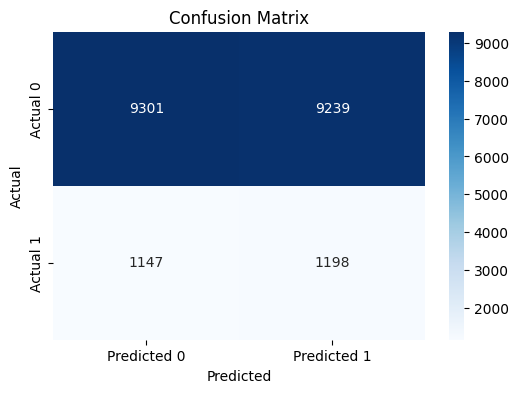

In [ ]:
preds_train_HEF = predict_random(df_train_HEF, task='clf')

# Evaluation Metrics (we see how we predict correctly 50% of the time)
print("Accuracy:", accuracy_score(df_train_HEF["HOSPITAL_EXPIRE_FLAG"], preds_train_HEF))
print("ROC AUC:", roc_auc_score(df_train_HEF["HOSPITAL_EXPIRE_FLAG"], preds_train_HEF))
print("Precision:", precision_score(df_train_HEF["HOSPITAL_EXPIRE_FLAG"], preds_train_HEF))
print("Recall:", recall_score(df_train_HEF["HOSPITAL_EXPIRE_FLAG"], preds_train_HEF))
print("F1 Score:", f1_score(df_train_HEF["HOSPITAL_EXPIRE_FLAG"], preds_train_HEF))

# Confusion Matrix
cm = confusion_matrix(df_train_HEF["HOSPITAL_EXPIRE_FLAG"], preds_train_HEF)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

Always Positive Model Evaluation Metrics:
Accuracy: 0.11228154177639454
ROC AUC: 0.5
Precision: 0.11228154177639454
Recall: 1.0
F1 Score: 0.20189410245372363


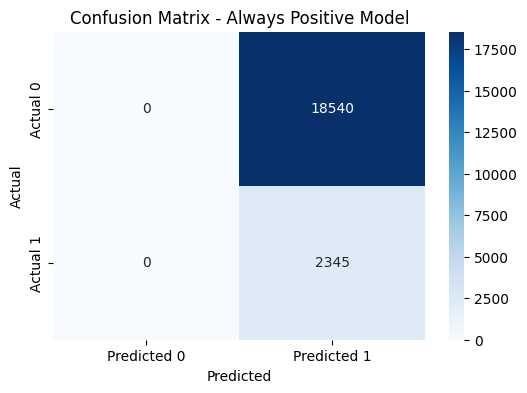

In [ ]:
# What about always positive or always negative models?

# POSITIVE
preds_train_HEF_pos = np.ones(df_train_HEF.shape[0])

print("Always Positive Model Evaluation Metrics:")
print("Accuracy:", accuracy_score(df_train_HEF["HOSPITAL_EXPIRE_FLAG"], preds_train_HEF_pos))
print("ROC AUC:", roc_auc_score(df_train_HEF["HOSPITAL_EXPIRE_FLAG"], preds_train_HEF_pos))
print("Precision:", precision_score(df_train_HEF["HOSPITAL_EXPIRE_FLAG"], preds_train_HEF_pos))
print("Recall:", recall_score(df_train_HEF["HOSPITAL_EXPIRE_FLAG"], preds_train_HEF_pos))  
print("F1 Score:", f1_score(df_train_HEF["HOSPITAL_EXPIRE_FLAG"], preds_train_HEF_pos))

# CM
cm_pos = confusion_matrix(df_train_HEF["HOSPITAL_EXPIRE_FLAG"], preds_train_HEF_pos)
plt.figure(figsize=(6,4))
sns.heatmap(cm_pos, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Always Positive Model')
plt.show()

Always Negative Model Evaluation Metrics:
Accuracy: 0.8877184582236055
ROC AUC: 0.5
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/Users/guillemmirabentrubinat/Documents/BSE/zz Teaching/Machine Learning/ML_TA_Sessions/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


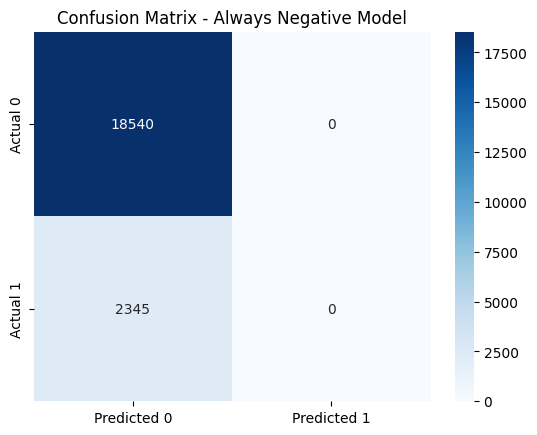

In [93]:
# NEGATIVE
preds_train_HEF_neg = np.zeros(df_train_HEF.shape[0])

print("Always Negative Model Evaluation Metrics:")
print("Accuracy:", accuracy_score(df_train_HEF["HOSPITAL_EXPIRE_FLAG"], preds_train_HEF_neg))
print("ROC AUC:", roc_auc_score(df_train_HEF["HOSPITAL_EXPIRE_FLAG"], preds_train_HEF_neg))
print("Precision:", precision_score(df_train_HEF["HOSPITAL_EXPIRE_FLAG"], preds_train_HEF_neg))
print("Recall:", recall_score(df_train_HEF["HOSPITAL_EXPIRE_FLAG"], preds_train_HEF_neg))  
print("F1 Score:", f1_score(df_train_HEF["HOSPITAL_EXPIRE_FLAG"], preds_train_HEF_neg))

# CM
cm_neg = confusion_matrix(df_train_HEF["HOSPITAL_EXPIRE_FLAG"], preds_train_HEF_neg)
sns.heatmap(cm_neg, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Always Negative Model')
plt.show()